In [26]:
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%run ProcessData.ipynb
%run PlottingMethods.ipynb

# Running code

##      <span style="color:orange">A.  LSA</span>

###      <span style="color:green"><u>Min Function</u></span>

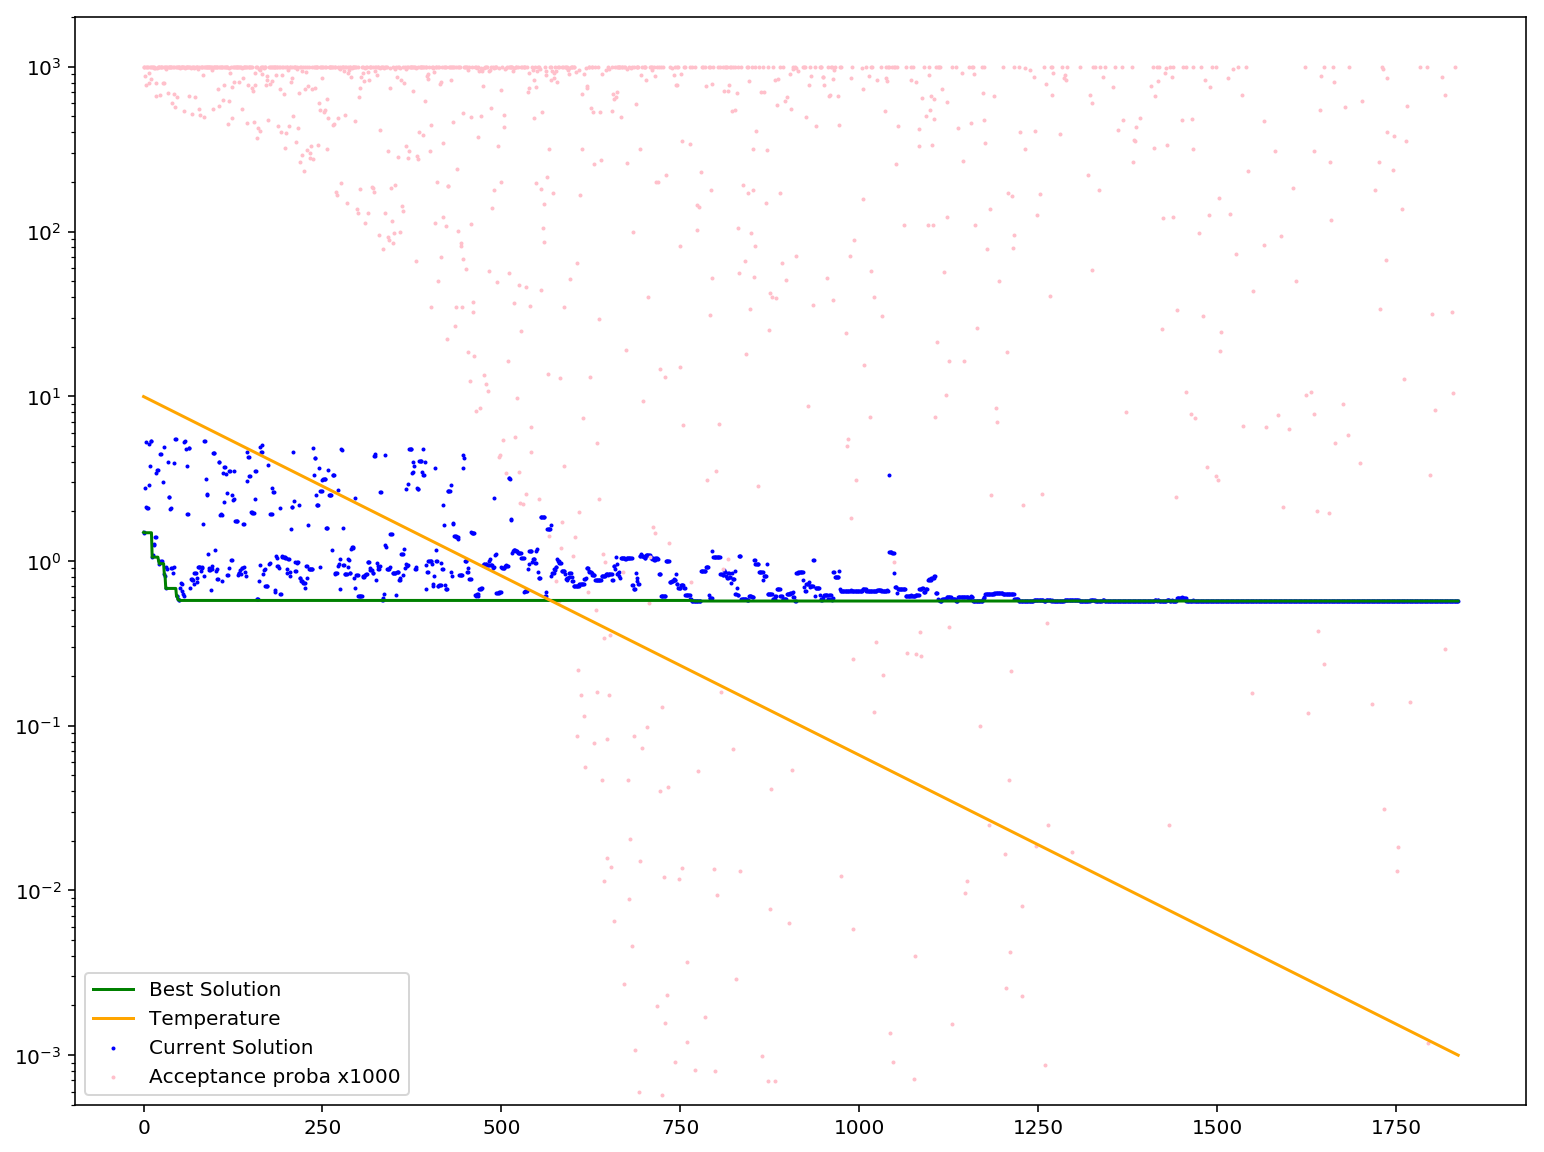

In [20]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 1000)

----
###      <span style="color:green"><u>Traveling Salesman Problem</u></span>

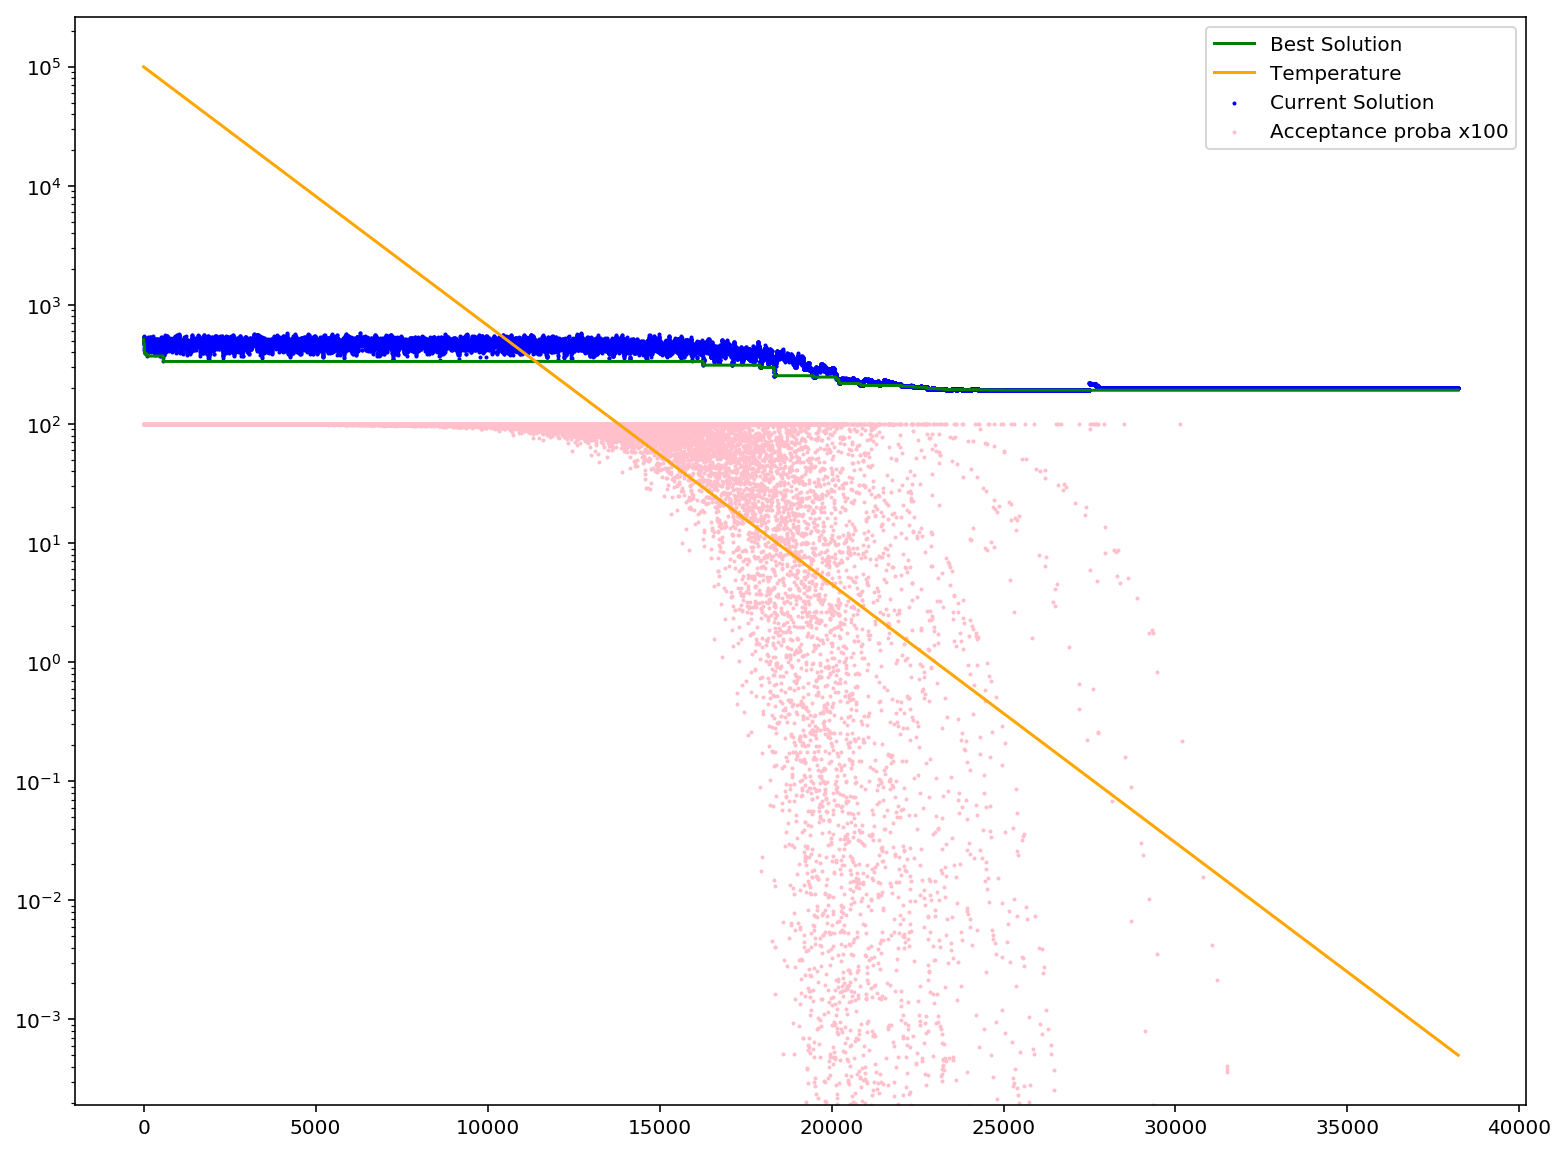

In [21]:
path = "../java/SimulatedAnnealing/GraphData/LSA_TSP.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 100)

----

##      <span style="color:orange">B.  DSA</span>

###      <span style="color:green"><u>Min Function</u></span>

[0.60794191 0.60794191 0.58041312 0.58041312 0.5754171  0.5754171
 0.5754171  0.5754171  0.5754171  0.5754171  0.5754171  0.5754171
 0.5754171  0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535 0.57436535
 0.57436535 0.57436535 0.57370239 0.57370239 0.57370239 0.57370239
 0.57370239 0.57370239 0.57370239 0.57370239 0.57370239 0.57370239
 0.57370239 0.57370239 0.57370239 0.57370239 0.57370239 0.57370239
 0.56935862 0.56935862 0.56935862 0.56935862 0.56935862 0.56935862
 0.56935862 0.56935862 0.56935862 0.56935862 0.56935862 0.569358

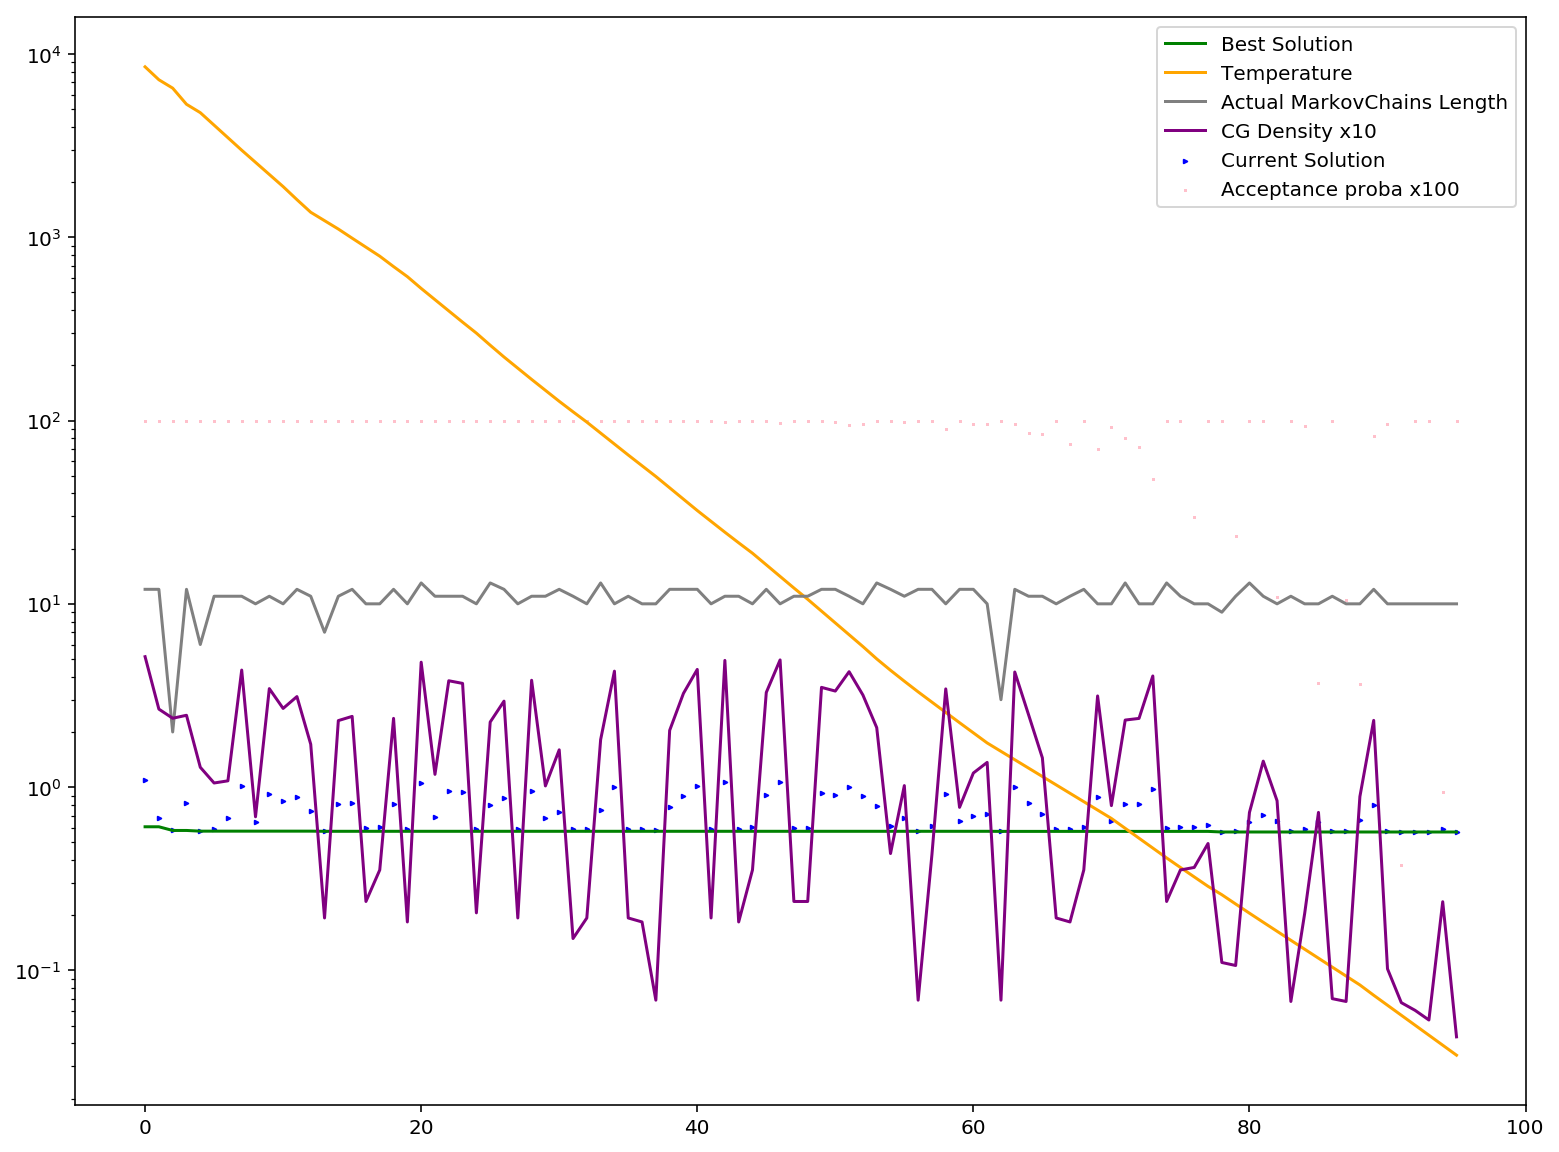

In [27]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

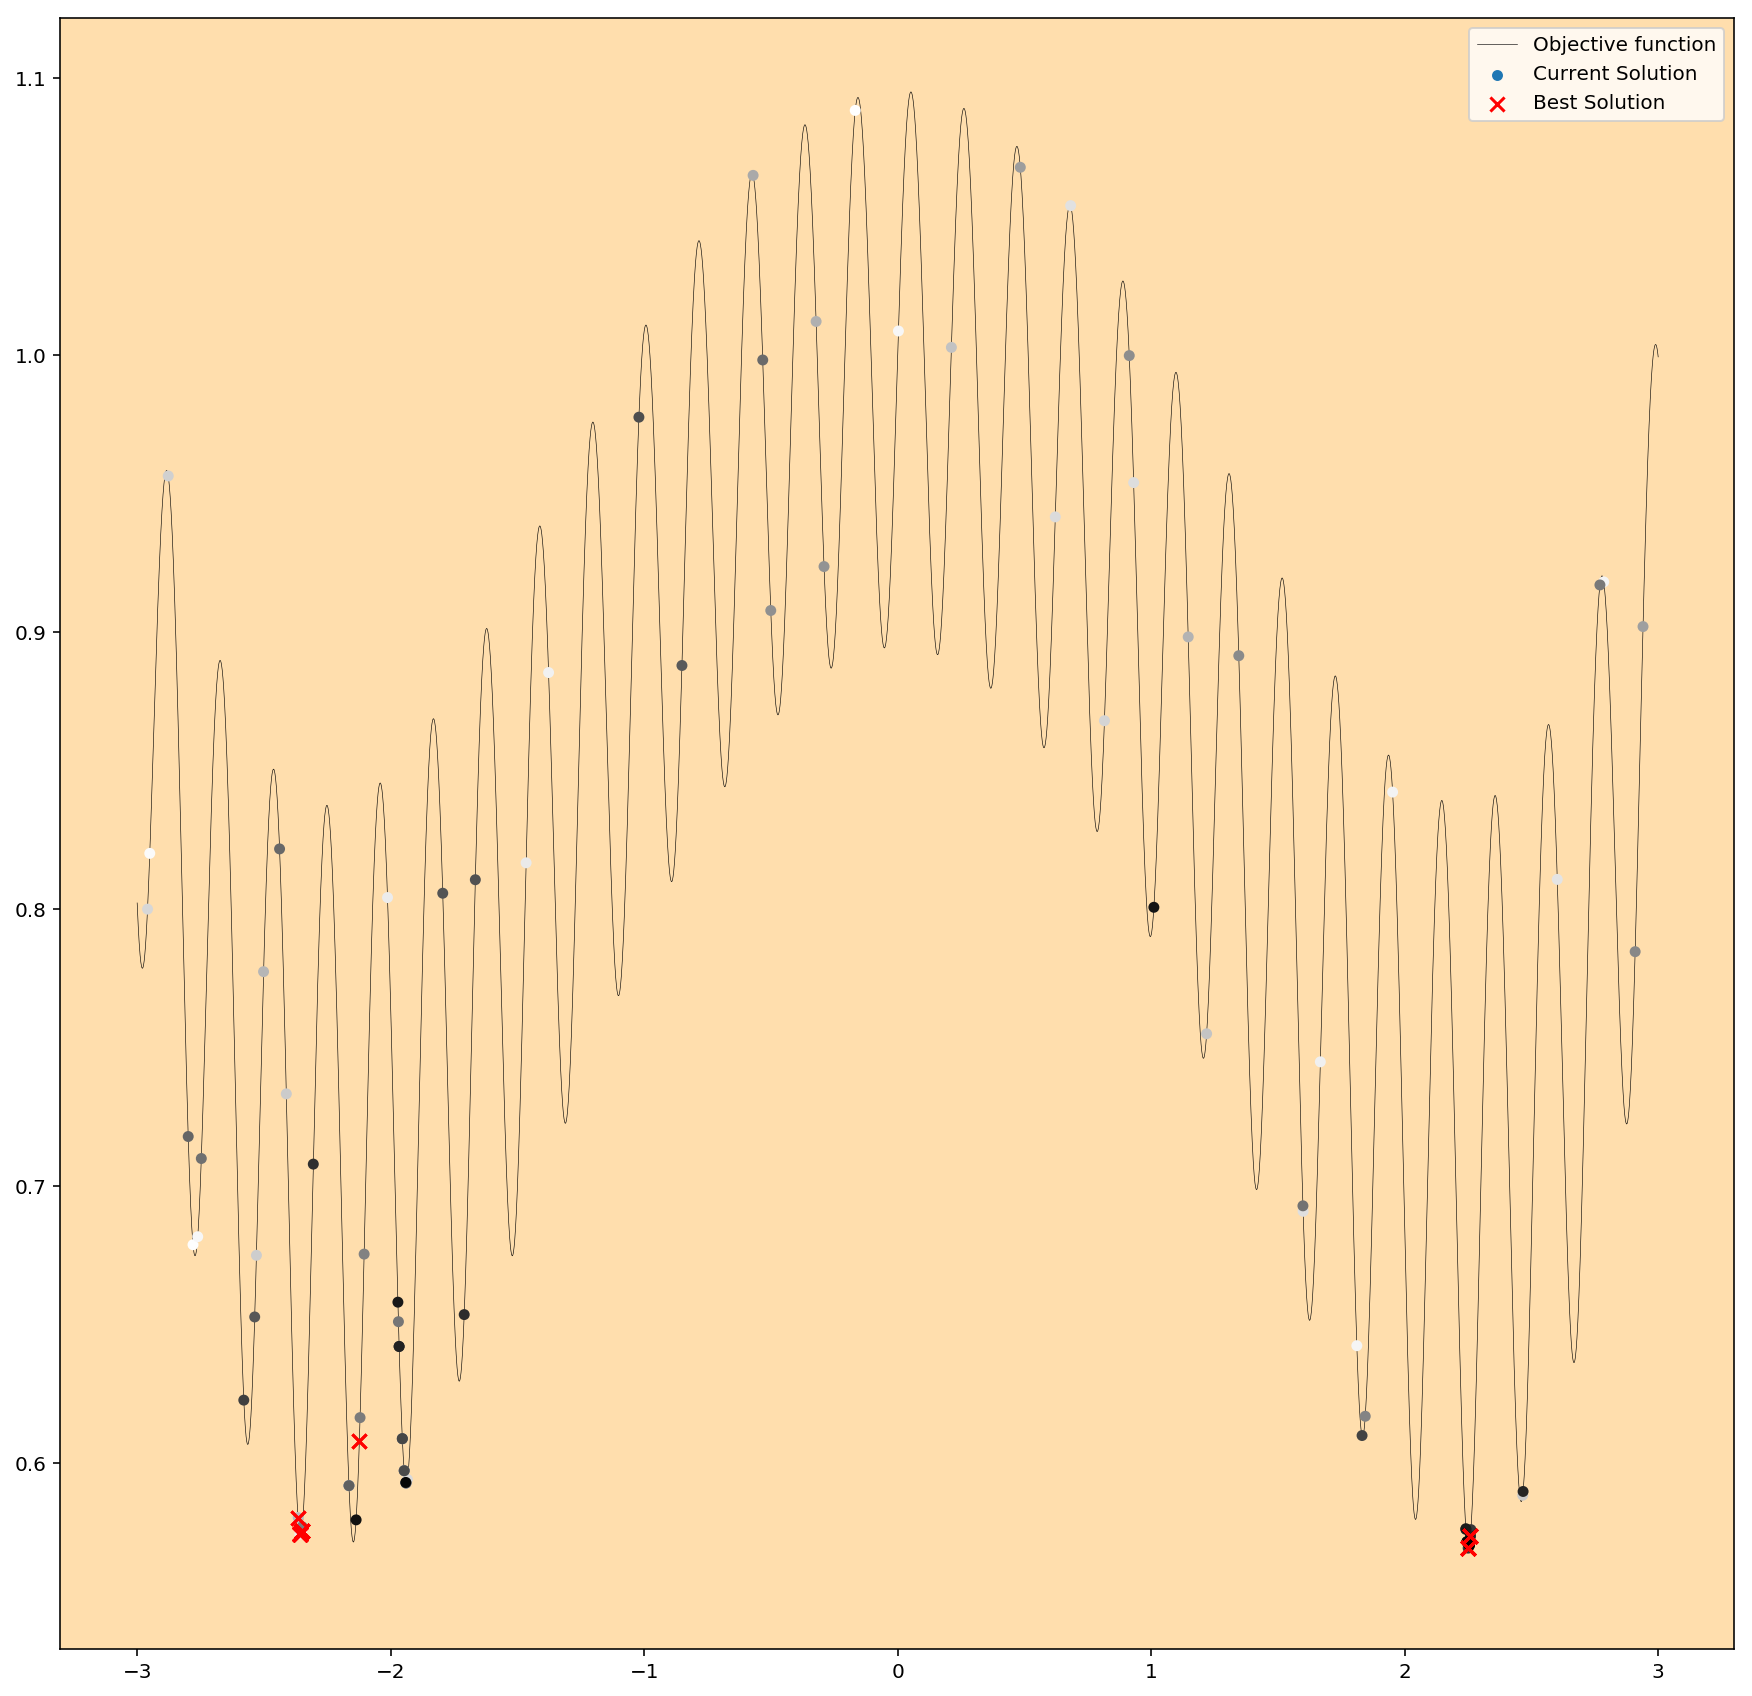

In [28]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MF_currX.txt"
best_x, curr_x = processDataDSA_MF(path)
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

###      <span style="color:green"><u>Min Function 3D</u></span>

[0.64345317 0.54031567 0.3373438  0.3373438  0.3373438  0.33562765
 0.25890111 0.25890111 0.21631884 0.14558379 0.07575914 0.07575914
 0.07575914 0.07575914 0.07575914 0.07575914 0.07575914 0.07575914
 0.07575914 0.07575914 0.07575914 0.03687217 0.03687217 0.03687217
 0.03687217 0.03687217 0.03687217 0.03687217 0.03687217 0.03687217
 0.03687217 0.03687217 0.03687217 0.03687217 0.03687217 0.0348706
 0.0348706  0.0348706  0.0348706  0.0348706  0.0348706  0.0348706
 0.0348706  0.0348706  0.0348706  0.0348706  0.0348706  0.0348706
 0.0348706  0.0348706  0.02568185 0.02568185 0.02568185 0.02568185
 0.02568185 0.02562995 0.02562995 0.01904494 0.01904494 0.01904494
 0.01904494 0.00982001 0.00982001 0.00982001 0.00982001 0.00982001
 0.00982001 0.00873533 0.00873533 0.00873533 0.00873533 0.00873533
 0.0073293  0.0073293  0.00722805 0.00722805 0.00722805 0.00722805
 0.00722805 0.00722805 0.00722805 0.00722805 0.00722805 0.00722805
 0.00646208 0.00646208 0.00646208 0.00646208 0.00625898 0.0062589

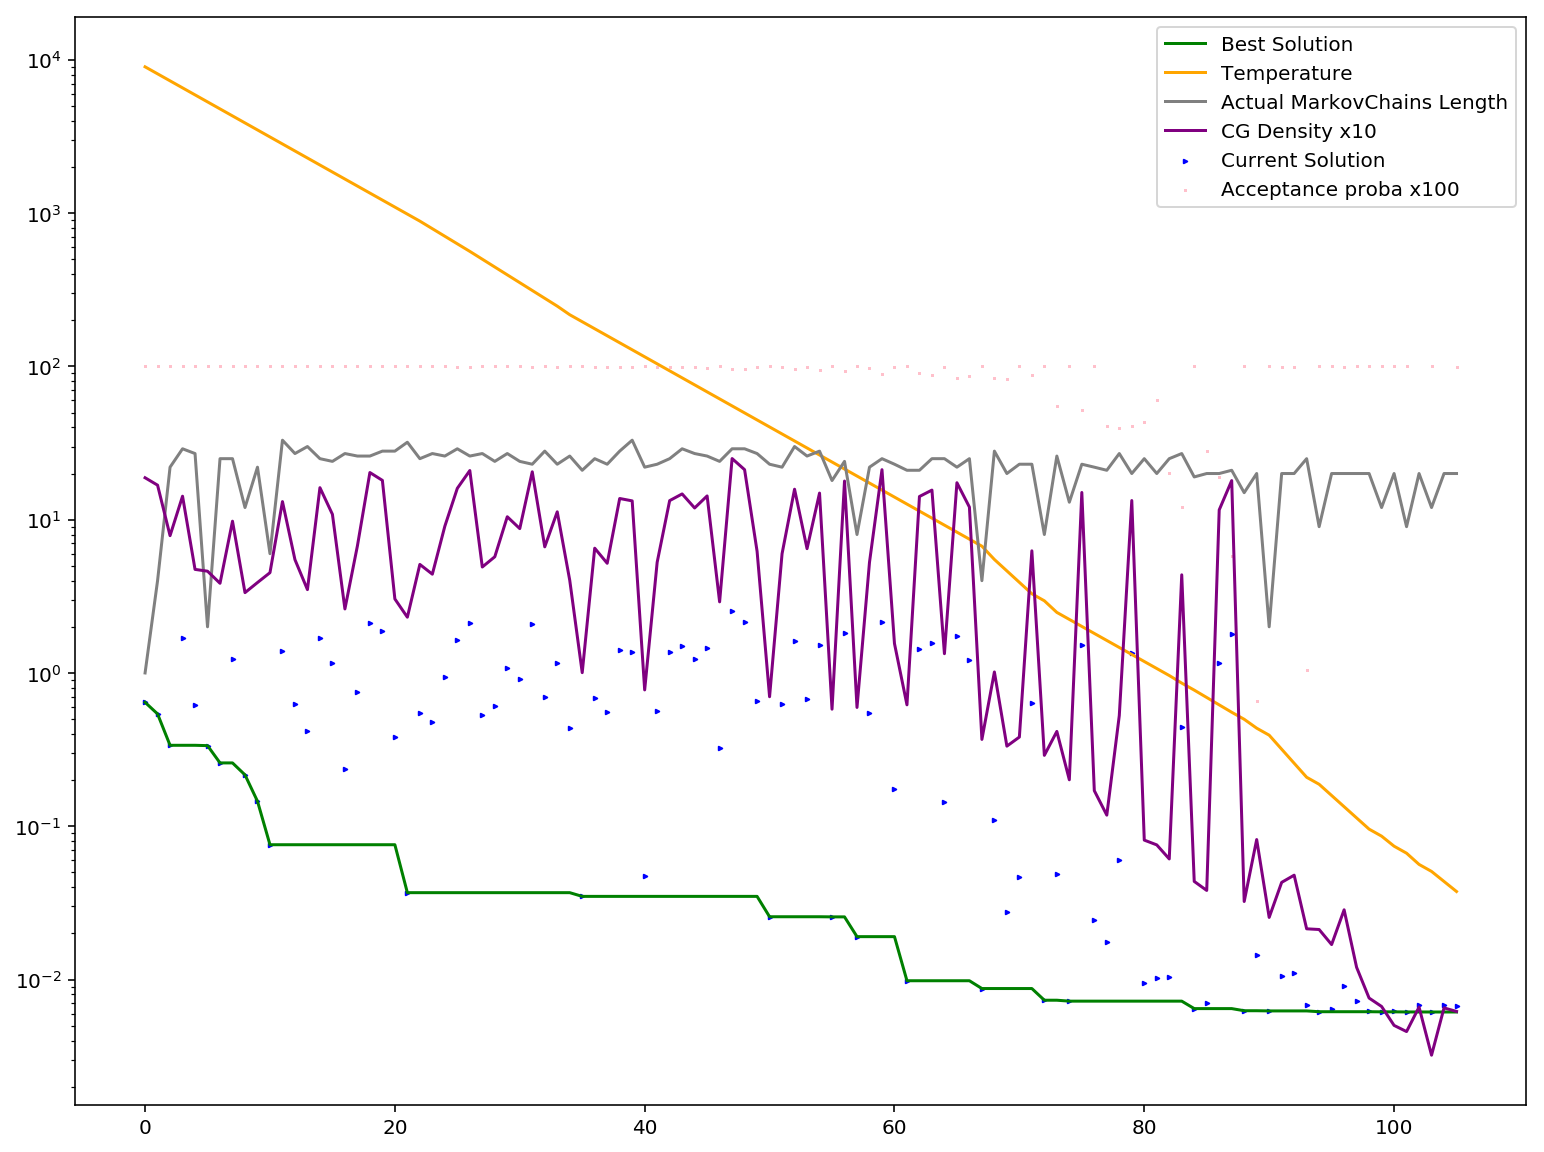

In [29]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction3D.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

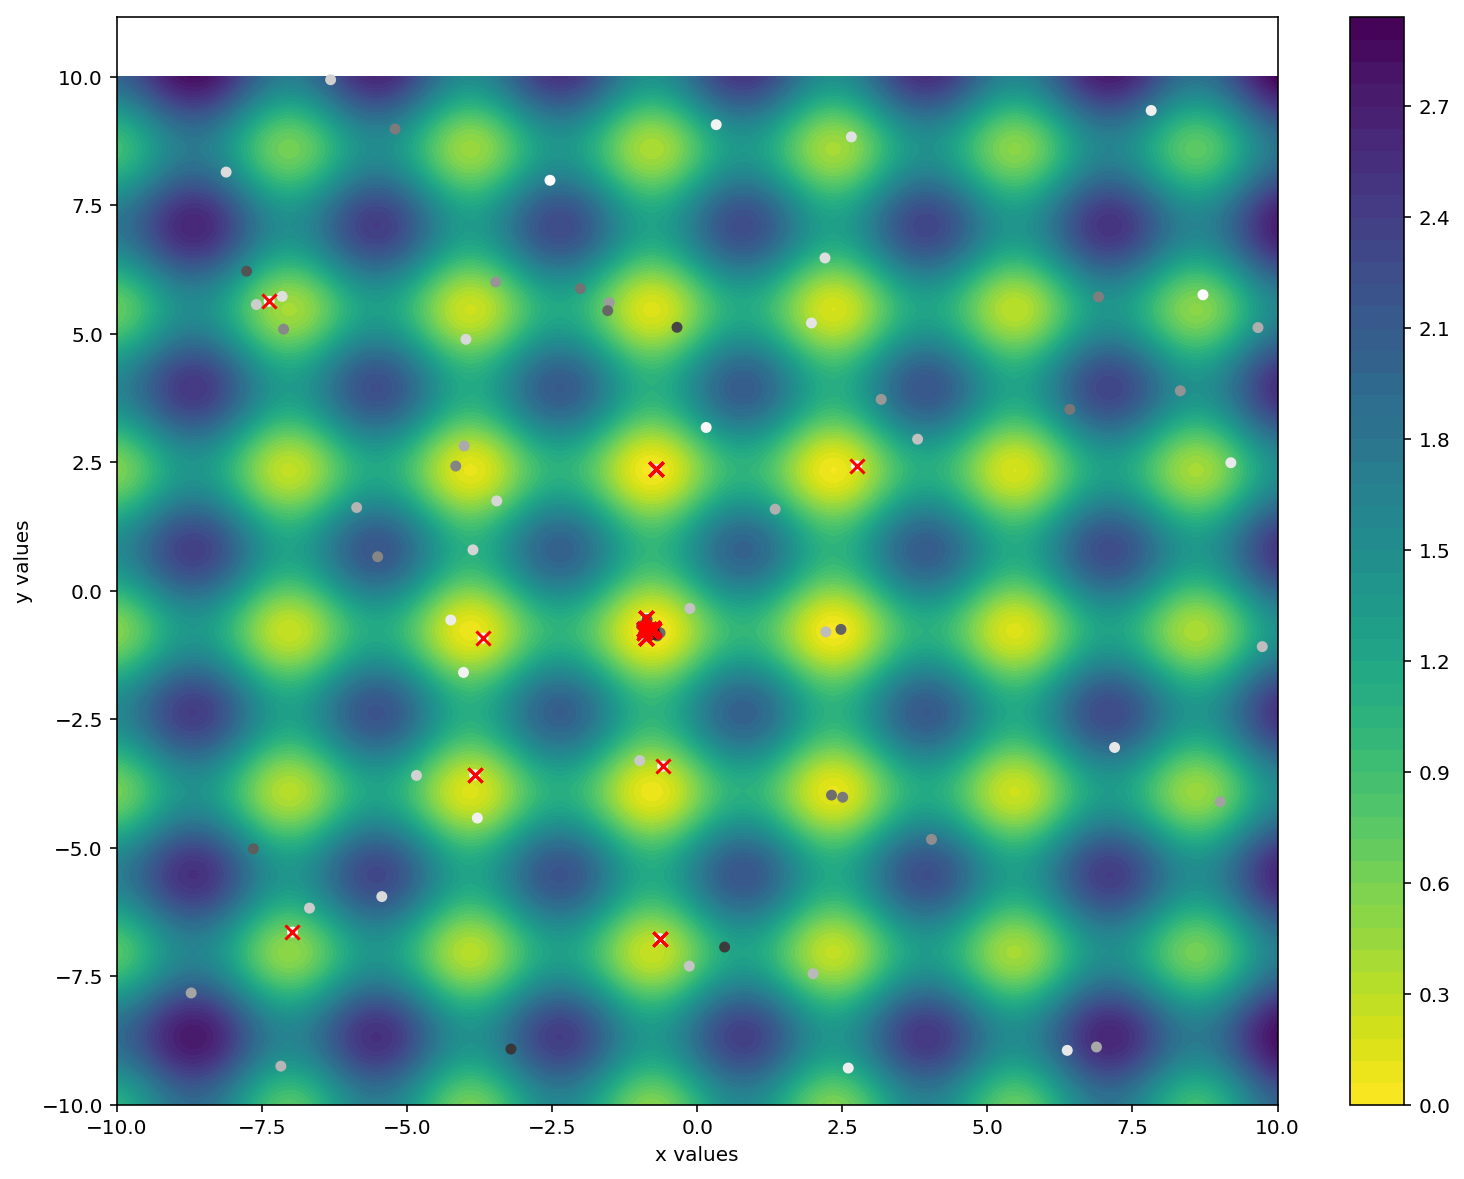

In [30]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MF3D_currXY.txt"
best_x, curr_x, best_y, curr_y = processDataDSA_MF3D(path)
drawSolutionDSAMF3D(curr_y, best_y, curr_x, best_x)